In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import pandas as pd
import math

In [2]:
df = pd.read_csv('../2.Feature Engineering/new data/modelling_set.csv')
df.describe()

,MemberID,LabCount_total,LabCount_max,LabCount_min,LabCount_ave,LabCount_months,LabCount_std,DrugCount_total,DrugCount_max,DrugCount_min,...,ProcedureGroup_Count_SO,ProcedureGroup_Count_SMCD,AgeAtFirstClaim,Male,Female,MissSex,MissAge,ClaimsTruncated,TARGET,trainset
count,2.184150e+05,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,...,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.0,218415.000000,147473.000000,218415.000000
mean,4.993458e+07,6.471827,3.829439,2.181860,2.918800,1.655033,0.578166,10.387318,2.193531,0.962237,...,0.001699,0.015457,47.750155,0.363524,0.448078,0.188398,0.0,0.054863,0.452951,0.675196
std,2.892479e+07,7.734678,3.440373,2.507408,2.676663,1.906704,1.683426,15.721582,2.271990,1.057978,...,0.047286,0.262061,23.238375,0.481015,0.497298,0.391031,0.0,0.227714,1.573818,0.468303
min,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.478774e+07,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,4.993677e+07,4.000000,4.000000,1.000000,2.666667,1.000000,0.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
75%,7.515525e+07,10.000000,7.000000,3.000000,5.000000,2.000000,1.527525,14.000000,4.000000,1.000000,...,0.000000,0.000000,65.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,9.999882e+07,111.000000,10.000000,10.000000,10.000000,12.000000,6.363961,84.000000,7.000000,7.000000,...,4.000000,23.000000,80.000000,1.000000,1.000000,1.000000,0.0,1.000000,15.000000,1.000000


In [3]:
df_train = df[df['trainset']==1]

In [4]:
df_train.describe()

,MemberID,LabCount_total,LabCount_max,LabCount_min,LabCount_ave,LabCount_months,LabCount_std,DrugCount_total,DrugCount_max,DrugCount_min,...,ProcedureGroup_Count_SO,ProcedureGroup_Count_SMCD,AgeAtFirstClaim,Male,Female,MissSex,MissAge,ClaimsTruncated,TARGET,trainset
count,1.474730e+05,147473.000000,147473.000000,147473.000000,147473.000000,147473.000000,147473.000000,147473.000000,147473.000000,147473.000000,...,147473.000000,147473.000000,147473.000000,147473.000000,147473.000000,147473.000000,147473.0,147473.000000,147473.000000,147473.0
mean,4.994386e+07,6.391699,3.817465,2.179124,2.910567,1.644898,0.576201,10.409309,2.190754,0.959057,...,0.001478,0.015949,47.884731,0.362907,0.446678,0.190415,0.0,0.054349,0.452951,1.0
std,2.892040e+07,7.555581,3.428776,2.503624,2.669596,1.895061,1.683874,15.681812,2.261954,1.043603,...,0.043549,0.270775,23.342989,0.480840,0.497150,0.392629,0.0,0.226706,1.573818,0.0
min,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
25%,2.481269e+07,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
50%,4.993194e+07,4.000000,4.000000,1.000000,2.666667,1.000000,0.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
75%,7.516935e+07,10.000000,6.000000,3.000000,4.800000,2.000000,1.527525,15.000000,4.000000,1.000000,...,0.000000,0.000000,65.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.0
max,9.999882e+07,94.000000,10.000000,10.000000,10.000000,12.000000,6.363961,84.000000,7.000000,7.000000,...,4.000000,23.000000,80.000000,1.000000,1.000000,1.000000,0.0,1.000000,15.000000,1.0


In [5]:
#Count missing data
def count_missing(df):   
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data.head(20))
    return missing_data

count_missing(df_train)

                                         Total  Percent
trainset                                     0      0.0
PlaceSvc_Count_Unknown                       0      0.0
Specialty_Count_Surgery                      0      0.0
CharlsonIndex_range                          0      0.0
DSFS_range                                   0      0.0
no_PrimaryConditionGroup_PlaceSvc            0      0.0
no_ProcedureGroup_PrimaryConditionGroup      0      0.0
no_ProcedureGroup_Specialty                  0      0.0
no_PrimaryConditionGroup_Specialty           0      0.0
CharlsonIndex_std                            0      0.0
CharlsonIndex_ave                            0      0.0
CharlsonIndex_min                            0      0.0
CharlsonIndex_max                            0      0.0
CharlsonIndex_sum                            0      0.0
DSFS_std                                     0      0.0
DSFS_ave                                     0      0.0
DSFS_min                                     0  

,Total,Percent
trainset,0,0.0
PlaceSvc_Count_Unknown,0,0.0
Specialty_Count_Surgery,0,0.0
CharlsonIndex_range,0,0.0
DSFS_range,0,0.0
...,...,...
PrimaryConditionGroup_Count_CANCRB,0,0.0
PrimaryConditionGroup_Count_SKNAUT,0,0.0
PrimaryConditionGroup_Count_HIPFX,0,0.0
PrimaryConditionGroup_Count_GIBLEED,0,0.0


In [6]:
df_target = df[df['trainset']==0]

In [7]:
#df_train.drop("MemberID", axis = 1, inplace = True)
#df_train.drop("Year", axis = 1, inplace = True)
#df_train.drop("trainset", axis = 1, inplace = True)
m = (df_train.columns != 'TARGET') & (df_train.columns != 'MemberID') & (df_train.columns != 'Year') & (df_train.columns != 'trainset')
X = df_train.loc[:, m]
y = df_train['TARGET']
y.describe()

count    147473.000000
mean          0.452951
std           1.573818
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: TARGET, dtype: float64

In [8]:
X.head()

,LabCount_total,LabCount_max,LabCount_min,LabCount_ave,LabCount_months,LabCount_std,DrugCount_total,DrugCount_max,DrugCount_min,DrugCount_ave,...,ProcedureGroup_Count_SRS,ProcedureGroup_Count_SUS,ProcedureGroup_Count_SO,ProcedureGroup_Count_SMCD,AgeAtFirstClaim,Male,Female,MissSex,MissAge,ClaimsTruncated
0,2.0,2.0,2.0,2.0,1.0,-1.0,5.0,2.0,1.0,1.666667,...,0,0,0,0,35,0,0,1,0,0
1,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,35,0,0,1,0,0
3,10.0,10.0,10.0,10.0,1.0,-1.0,30.0,5.0,2.0,3.000000,...,0,0,0,0,45,0,1,0,0,0
4,3.0,3.0,3.0,3.0,1.0,-1.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,15,0,1,0,0,0
5,3.0,3.0,3.0,3.0,1.0,-1.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,15,0,1,0,0,0


In [9]:
count_missing(X)

                                         Total  Percent
ClaimsTruncated                              0      0.0
no_PrimaryConditionGroup_Specialty           0      0.0
Specialty_Count_Surgery                      0      0.0
CharlsonIndex_range                          0      0.0
DSFS_range                                   0      0.0
no_PrimaryConditionGroup_PlaceSvc            0      0.0
no_ProcedureGroup_PrimaryConditionGroup      0      0.0
no_ProcedureGroup_Specialty                  0      0.0
CharlsonIndex_std                            0      0.0
Specialty_Count_Laboratory                   0      0.0
CharlsonIndex_ave                            0      0.0
CharlsonIndex_min                            0      0.0
CharlsonIndex_max                            0      0.0
CharlsonIndex_sum                            0      0.0
DSFS_std                                     0      0.0
DSFS_ave                                     0      0.0
Specialty_Count_Internal                     0  

,Total,Percent
ClaimsTruncated,0,0.0
no_PrimaryConditionGroup_Specialty,0,0.0
Specialty_Count_Surgery,0,0.0
CharlsonIndex_range,0,0.0
DSFS_range,0,0.0
...,...,...
PrimaryConditionGroup_Count_ODaBNCA,0,0.0
PrimaryConditionGroup_Count_HEMTOL,0,0.0
PrimaryConditionGroup_Count_GYNECA,0,0.0
PrimaryConditionGroup_Count_APPCHOL,0,0.0


In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler().fit(X)
X_scl = scaler.transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scl, y, test_size=0.3, random_state=123)

In [12]:
def eval(model, X_test, y_test):
    y_pred = model.predict(X_test) # your predicted y values
    y_pred_int64 = y_pred.round(0).astype(int)
    # The root mean square logarithmic error
    msle = np.mean((np.log(y_pred_int64 + 1) - np.log(y_test + 1)) ** 2)
    rmsle = math.sqrt(msle)
    
    print ("RMSLE: %.4f" % rmsle)
    from sklearn.metrics import r2_score
    r2 = r2_score(y_pred, y_test)
    print ("R2 value: %.4f" % r2)
    return rmsle, r2

In [13]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = regr.predict(X_test)

In [15]:
y_pred

array([0.08126748, 0.082183  , 1.60128701, ..., 0.51156533, 0.43575966,
       0.7250663 ])

In [16]:
eval(regr, X_test, y_test)

RMSLE: inf
R2 value: -0.0000


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


(inf, -2.2603467298321078e-05)

In [17]:
#Data submit 
#df_target.drop("MemberID", axis = 1, inplace = True)
#df_target.drop("Year", axis = 1, inplace = True)
#df_target.drop("trainset", axis = 1, inplace = True)
m = (df_target.columns != 'TARGET') & (df_target.columns != 'MemberID') & (df_target.columns != 'Year') & (df_target.columns != 'trainset')
X_submit = df_target.loc[:, m]
y_submit = df_target['TARGET']
y_submit.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: TARGET, dtype: float64

In [18]:
count_missing(X_submit)

                                         Total  Percent
ClaimsTruncated                              0      0.0
no_PrimaryConditionGroup_Specialty           0      0.0
Specialty_Count_Surgery                      0      0.0
CharlsonIndex_range                          0      0.0
DSFS_range                                   0      0.0
no_PrimaryConditionGroup_PlaceSvc            0      0.0
no_ProcedureGroup_PrimaryConditionGroup      0      0.0
no_ProcedureGroup_Specialty                  0      0.0
CharlsonIndex_std                            0      0.0
Specialty_Count_Laboratory                   0      0.0
CharlsonIndex_ave                            0      0.0
CharlsonIndex_min                            0      0.0
CharlsonIndex_max                            0      0.0
CharlsonIndex_sum                            0      0.0
DSFS_std                                     0      0.0
DSFS_ave                                     0      0.0
Specialty_Count_Internal                     0  

,Total,Percent
ClaimsTruncated,0,0.0
no_PrimaryConditionGroup_Specialty,0,0.0
Specialty_Count_Surgery,0,0.0
CharlsonIndex_range,0,0.0
DSFS_range,0,0.0
...,...,...
PrimaryConditionGroup_Count_ODaBNCA,0,0.0
PrimaryConditionGroup_Count_HEMTOL,0,0.0
PrimaryConditionGroup_Count_GYNECA,0,0.0
PrimaryConditionGroup_Count_APPCHOL,0,0.0


In [19]:
X_submit_scl = scaler.transform(X_submit)

In [20]:
y_pred_submit = regr.predict(X_submit_scl)

submission = pd.DataFrame()
submission['MemberID'] = df_target['MemberID']

y_pred_submit = y_pred_submit.clip(min=0)
y_pred_submit = y_pred_submit.clip(max=15)
# pred_y = pred_y.astype(int)

submission['DIH'] = y_pred_submit
submission.groupby(['DIH']).size()
submission.to_csv('../4.Evaluation/linear.csv',index=False)

In [21]:
submission.groupby(['DIH']).size()

DIH
0.000000    2304
0.000019       1
0.000043       2
0.000141       1
0.000165       4
            ... 
3.919026       1
3.940757       1
3.973743       1
4.235970       1
4.687651       1
Length: 57738, dtype: int64

In [22]:
from sklearn.linear_model import Ridge

In [23]:
ridge = Ridge(alpha=0.0154159369284227, normalize=True)

In [24]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.0154159369284227, normalize=True)

In [25]:
ridge.score(X_train,y_train)

0.08031983687680355

In [26]:
ridge.score(X_test, y_test)

-0.02846826376226841

In [27]:
rmsle, r2 = eval(ridge, X_train, y_train)

RMSLE: inf
R2 value: -10.7979


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [28]:
rmsle, r2 = eval(ridge, X_test, y_test)

RMSLE: inf
R2 value: -5.0225


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [29]:
alphas = np.logspace(-10, 1, 400)

In [30]:
score = list()
for alpha in alphas:
    model = Ridge(alpha=alpha, normalize=True)
    model.fit(X_train, y_train)
    rmsle_train, r2_train = eval(model, X_train, y_train)
    rmsle_test, r2_test = eval(model, X_test, y_test)
    score.append([alpha, rmsle_train,rmsle_test])

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2428


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2433


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2435


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2439


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2442


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2445


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2448


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2451


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2453


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2455


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2458


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2460


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2461


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2463


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2465


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2467


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2468


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2469


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2471


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2472


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2473


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2474


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2475


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2476


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2477


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2478


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2479


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2479


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2480


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2481


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2481


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2482


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2482


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2483


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2483


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2484


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2484


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2485


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2485


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2485


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2486


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2486


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2486


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2487


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2487


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2487


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2487


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2487


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2488


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2488


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2488


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2488


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2488


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2490


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2488


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2488


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2488


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2488


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2488


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2488


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2487


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2487


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2487


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2487


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2487


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2486


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2486


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2486


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2485


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2485


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2485


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2484


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2484


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2483


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2483


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2482


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2482


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2481


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2481


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2480


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2479


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2479


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2478


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2477


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2476


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2475


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2474


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2473


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2472


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2470


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2469


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2468


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2466


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2465


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2463


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2461


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2459


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4162
RMSLE: inf
R2 value: -6.2457


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4163
RMSLE: inf
R2 value: -6.2455


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4163
RMSLE: inf
R2 value: -6.2453


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4163
RMSLE: inf
R2 value: -6.2450


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4163
RMSLE: inf
R2 value: -6.2447


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4163
RMSLE: inf
R2 value: -6.2445


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4163
RMSLE: inf
R2 value: -6.2442


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4163
RMSLE: inf
R2 value: -6.2438


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4163
RMSLE: inf
R2 value: -6.2435


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4163
RMSLE: inf
R2 value: -6.2431


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4163
RMSLE: inf
R2 value: -6.2427


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4163
RMSLE: inf
R2 value: -6.2423


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4163
RMSLE: inf
R2 value: -6.2419


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4164
RMSLE: inf
R2 value: -6.2414


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4164
RMSLE: inf
R2 value: -6.2409


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4164
RMSLE: inf
R2 value: -6.2404


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4164
RMSLE: inf
R2 value: -6.2398


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4164
RMSLE: inf
R2 value: -6.2392


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4164
RMSLE: inf
R2 value: -6.2386


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4164
RMSLE: inf
R2 value: -6.2379


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4165
RMSLE: inf
R2 value: -6.2372


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4165
RMSLE: inf
R2 value: -6.2364


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4165
RMSLE: inf
R2 value: -6.2356


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4165
RMSLE: inf
R2 value: -6.2347


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4165
RMSLE: inf
R2 value: -6.2338


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4166
RMSLE: inf
R2 value: -6.2328


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4166
RMSLE: inf
R2 value: -6.2317


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4166
RMSLE: inf
R2 value: -6.2306


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4167
RMSLE: inf
R2 value: -6.2294


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4167
RMSLE: inf
R2 value: -6.2281


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4167
RMSLE: inf
R2 value: -6.2267


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4168
RMSLE: inf
R2 value: -6.2253


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4168
RMSLE: inf
R2 value: -6.2238


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4168
RMSLE: inf
R2 value: -6.2221


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4169
RMSLE: inf
R2 value: -6.2204


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4169
RMSLE: inf
R2 value: -6.2185


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4170
RMSLE: inf
R2 value: -6.2166


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4170
RMSLE: inf
R2 value: -6.2145


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4171
RMSLE: inf
R2 value: -6.2122


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4171
RMSLE: inf
R2 value: -6.2099


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4172
RMSLE: inf
R2 value: -6.2073


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4173
RMSLE: inf
R2 value: -6.2047


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4173
RMSLE: inf
R2 value: -6.2018


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4174
RMSLE: inf
R2 value: -6.1988


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4175
RMSLE: inf
R2 value: -6.1956


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4176
RMSLE: inf
R2 value: -6.1922


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4177
RMSLE: inf
R2 value: -6.1886


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4178
RMSLE: inf
R2 value: -6.1847


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4179
RMSLE: inf
R2 value: -6.1807


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4180
RMSLE: inf
R2 value: -6.1763


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4181
RMSLE: inf
R2 value: -6.1717


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4182
RMSLE: inf
R2 value: -6.1669


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4184
RMSLE: inf
R2 value: -6.1617


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4185
RMSLE: inf
R2 value: -6.1563


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4186
RMSLE: inf
R2 value: -6.1505


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4188
RMSLE: inf
R2 value: -6.1443


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4190
RMSLE: inf
R2 value: -6.1378


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4192
RMSLE: inf
R2 value: -6.1310


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4193
RMSLE: inf
R2 value: -6.1237


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4195
RMSLE: inf
R2 value: -6.1160


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4198
RMSLE: inf
R2 value: -6.1079


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4200
RMSLE: inf
R2 value: -6.0993


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4202
RMSLE: inf
R2 value: -6.0903


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4205
RMSLE: inf
R2 value: -6.0807


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4208
RMSLE: inf
R2 value: -6.0707


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4210
RMSLE: inf
R2 value: -6.0601


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4213
RMSLE: inf
R2 value: -6.0489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4217
RMSLE: inf
R2 value: -6.0371


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4220
RMSLE: inf
R2 value: -6.0247


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4224
RMSLE: inf
R2 value: -6.0117


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4228
RMSLE: inf
R2 value: -5.9981


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4232
RMSLE: inf
R2 value: -5.9838


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4236
RMSLE: inf
R2 value: -5.9688


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4241
RMSLE: inf
R2 value: -5.9530


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4245
RMSLE: inf
R2 value: -5.9366


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4251
RMSLE: inf
R2 value: -5.9194


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4256
RMSLE: inf
R2 value: -5.9015


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4262
RMSLE: inf
R2 value: -5.8828


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4268
RMSLE: inf
R2 value: -5.8633


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4274
RMSLE: inf
R2 value: -5.8430


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4281
RMSLE: inf
R2 value: -5.8220


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4288
RMSLE: inf
R2 value: -5.8001


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4296
RMSLE: inf
R2 value: -5.7775


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4304
RMSLE: inf
R2 value: -5.7540


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4312
RMSLE: inf
R2 value: -5.7298


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4321
RMSLE: inf
R2 value: -5.7048


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4330
RMSLE: inf
R2 value: -5.6791


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4340
RMSLE: inf
R2 value: -5.6527


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4351
RMSLE: inf
R2 value: -5.6255


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4362
RMSLE: inf
R2 value: -5.5977


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4373
RMSLE: inf
R2 value: -5.5693


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4386
RMSLE: inf
R2 value: -5.5402


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4399
RMSLE: inf
R2 value: -5.5106


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4412
RMSLE: inf
R2 value: -5.4805


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4427
RMSLE: inf
R2 value: -5.4500


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4442
RMSLE: inf
R2 value: -5.4191


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4458
RMSLE: inf
R2 value: -5.3878


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4475
RMSLE: inf
R2 value: -5.3564


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4493
RMSLE: inf
R2 value: -5.3247


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4512
RMSLE: inf
R2 value: -5.2929


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4532
RMSLE: inf
R2 value: -5.2611


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4554
RMSLE: inf
R2 value: -5.2294


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4576
RMSLE: inf
R2 value: -5.1978


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4600
RMSLE: inf
R2 value: -5.1664


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4625
RMSLE: inf
R2 value: -5.1354


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4651
RMSLE: inf
R2 value: -5.1048


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4679
RMSLE: inf
R2 value: -5.0747


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4709
RMSLE: inf
R2 value: -5.0451


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4740
RMSLE: inf
R2 value: -5.0163


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4774
RMSLE: inf
R2 value: -4.9882


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4809
RMSLE: inf
R2 value: -4.9610


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4846
RMSLE: inf
R2 value: -4.9347


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4885
RMSLE: inf
R2 value: -4.9095


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4927
RMSLE: inf
R2 value: -4.8854


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.4971
RMSLE: inf
R2 value: -4.8626


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.5017
RMSLE: inf
R2 value: -4.8410


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.5067
RMSLE: inf
R2 value: -4.8208


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.5119
RMSLE: inf
R2 value: -4.8021


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.5174
RMSLE: inf
R2 value: -4.7849


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.5232
RMSLE: inf
R2 value: -4.7693


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.5294
RMSLE: inf
R2 value: -4.7554


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.5359
RMSLE: inf
R2 value: -4.7432


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.5428
RMSLE: inf
R2 value: -4.7329


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.5501
RMSLE: inf
R2 value: -4.7244


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.5578
RMSLE: inf
R2 value: -4.7179


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.5660
RMSLE: inf
R2 value: -4.7135


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.5746
RMSLE: inf
R2 value: -4.7111


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.5837
RMSLE: inf
R2 value: -4.7109


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.5933
RMSLE: inf
R2 value: -4.7130


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.6035
RMSLE: inf
R2 value: -4.7173


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.6142
RMSLE: inf
R2 value: -4.7240


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.6255
RMSLE: inf
R2 value: -4.7332


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.6374
RMSLE: inf
R2 value: -4.7450


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.6499
RMSLE: inf
R2 value: -4.7593


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.6632
RMSLE: inf
R2 value: -4.7764


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.6772
RMSLE: inf
R2 value: -4.7962


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.6919
RMSLE: inf
R2 value: -4.8189


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.7074
RMSLE: inf
R2 value: -4.8447


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.7237
RMSLE: inf
R2 value: -4.8735


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.7408
RMSLE: inf
R2 value: -4.9056


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.7589
RMSLE: inf
R2 value: -4.9411


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.7779
RMSLE: inf
R2 value: -4.9800


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.7979
RMSLE: inf
R2 value: -5.0225


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.8189
RMSLE: inf
R2 value: -5.0688


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.8410
RMSLE: inf
R2 value: -5.1191


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.8642
RMSLE: inf
R2 value: -5.1735


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.8885
RMSLE: inf
R2 value: -5.2322


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.9141
RMSLE: inf
R2 value: -5.2953


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.9409
RMSLE: inf
R2 value: -5.3632


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.9690
RMSLE: inf
R2 value: -5.4359


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -10.9986
RMSLE: inf
R2 value: -5.5138


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.0295
RMSLE: inf
R2 value: -5.5970


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.0620
RMSLE: inf
R2 value: -5.6858


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.0960
RMSLE: inf
R2 value: -5.7804


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.1316
RMSLE: inf
R2 value: -5.8812


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.1689
RMSLE: inf
R2 value: -5.9883


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.2080
RMSLE: inf
R2 value: -6.1021


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.2488
RMSLE: inf
R2 value: -6.2228


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.2916
RMSLE: inf
R2 value: -6.3506


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.3363
RMSLE: inf
R2 value: -6.4859


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.3831
RMSLE: inf
R2 value: -6.6288


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.4320
RMSLE: inf
R2 value: -6.7798


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.4831
RMSLE: inf
R2 value: -6.9388


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.5364
RMSLE: inf
R2 value: -7.1063


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.5922
RMSLE: inf
R2 value: -7.2824


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.6503
RMSLE: inf
R2 value: -7.4671


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.7110
RMSLE: inf
R2 value: -7.6608


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.7744
RMSLE: inf
R2 value: -7.8633


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.8405
RMSLE: inf
R2 value: -8.0748


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.9093
RMSLE: inf
R2 value: -8.2951


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -11.9811
RMSLE: inf
R2 value: -8.5243


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -12.0559
RMSLE: inf
R2 value: -8.7621


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -12.1338
RMSLE: inf
R2 value: -9.0083


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -12.2150
RMSLE: inf
R2 value: -9.2626


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -12.2994
RMSLE: inf
R2 value: -9.5246


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -12.3873
RMSLE: inf
R2 value: -9.7938


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -12.4787
RMSLE: inf
R2 value: -10.0696


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -12.5738
RMSLE: inf
R2 value: -10.3516


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -12.6726
RMSLE: inf
R2 value: -10.6389


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -12.7754
RMSLE: inf
R2 value: -10.9310


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -12.8821
RMSLE: inf
R2 value: -11.2270


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -12.9929
RMSLE: inf
R2 value: -11.5262


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -13.1080
RMSLE: inf
R2 value: -11.8279


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -13.2275
RMSLE: inf
R2 value: -12.1312


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -13.3515
RMSLE: 0.5183
R2 value: -12.4354


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -13.4800
RMSLE: 0.5182
R2 value: -12.7399


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -13.6134
RMSLE: 0.5182
R2 value: -13.0442


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -13.7515
RMSLE: 0.5180
R2 value: -13.3475


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -13.8947
RMSLE: 0.5180
R2 value: -13.6497
RMSLE: 0.5115
R2 value: -14.0431
RMSLE: 0.5181
R2 value: -13.9502


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5114
R2 value: -14.1967
RMSLE: 0.5184
R2 value: -14.2489


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5115
R2 value: -14.3556
RMSLE: 0.5188
R2 value: -14.5458


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5115
R2 value: -14.5201
RMSLE: 0.5187
R2 value: -14.8407


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5118
R2 value: -14.6903
RMSLE: 0.5188
R2 value: -15.1338


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5119
R2 value: -14.8662
RMSLE: 0.5189
R2 value: -15.4252


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5120
R2 value: -15.0480
RMSLE: 0.5193
R2 value: -15.7153


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5122
R2 value: -15.2359
RMSLE: 0.5194
R2 value: -16.0044


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5124
R2 value: -15.4299
RMSLE: 0.5197
R2 value: -16.2929


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5125
R2 value: -15.6302
RMSLE: 0.5194
R2 value: -16.5813
RMSLE: 0.5128


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


R2 value: -15.8370
RMSLE: 0.5195
R2 value: -16.8701


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5132
R2 value: -16.0503
RMSLE: 0.5197
R2 value: -17.1598


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5135
R2 value: -16.2703
RMSLE: 0.5198
R2 value: -17.4510


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5136
R2 value: -16.4972
RMSLE: 0.5200
R2 value: -17.7443


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5138
R2 value: -16.7311
RMSLE: 0.5203
R2 value: -18.0402


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5142
R2 value: -16.9722
RMSLE: 0.5206
R2 value: -18.3394


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5146
R2 value: -17.2206
RMSLE: 0.5208
R2 value: -18.6425


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5150
R2 value: -17.4766
RMSLE: 0.5210
R2 value: -18.9500


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5154
R2 value: -17.7403
RMSLE: 0.5214
R2 value: -19.2625


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5157
R2 value: -18.0120
RMSLE: 0.5221
R2 value: -19.5806


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5159
R2 value: -18.2919
RMSLE: 0.5227
R2 value: -19.9048


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5162
R2 value: -18.5803
RMSLE: 0.5230
R2 value: -20.2359


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5163
R2 value: -18.8774
RMSLE: 0.5228
R2 value: -20.5743


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5163
R2 value: -19.1837
RMSLE: 0.5231
R2 value: -20.9208


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5167
R2 value: -19.4996
RMSLE: 0.5233
R2 value: -21.2758


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5168
R2 value: -19.8254
RMSLE: 0.5235
R2 value: -21.6402


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5171
R2 value: -20.1616
RMSLE: 0.5237
R2 value: -22.0146


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5175
R2 value: -20.5088
RMSLE: 0.5241
R2 value: -22.3997


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5177
R2 value: -20.8675
RMSLE: 0.5240
R2 value: -22.7964


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5179
R2 value: -21.2385
RMSLE: 0.5246
R2 value: -23.2056


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5182
R2 value: -21.6226
RMSLE: 0.5247
R2 value: -23.6281


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5185
R2 value: -22.0205
RMSLE: 0.5251
R2 value: -24.0650


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5189
R2 value: -22.4332
RMSLE: 0.5254
R2 value: -24.5175


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5191
R2 value: -22.8618
RMSLE: 0.5259
R2 value: -24.9867


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5193
R2 value: -23.3075
RMSLE: 0.5261
R2 value: -25.4740


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5198
R2 value: -23.7715
RMSLE: 0.5264
R2 value: -25.9809


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5203
R2 value: -24.2554
RMSLE: 0.5269
R2 value: -26.5091


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5206
R2 value: -24.7607
RMSLE: 0.5270
R2 value: -27.0604


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5209
R2 value: -25.2892
RMSLE: 0.5272
R2 value: -27.6367


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5213
R2 value: -25.8429
RMSLE: 0.5274
R2 value: -28.2402
RMSLE: 0.5216


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


R2 value: -26.4240
RMSLE: 0.5274
R2 value: -28.8733


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5219
R2 value: -27.0350
RMSLE: 0.5279
R2 value: -29.5388


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5222
R2 value: -27.6784
RMSLE: 0.5280
R2 value: -30.2395


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5227
R2 value: -28.3572
RMSLE: 0.5283
R2 value: -30.9787


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5230
R2 value: -29.0747
RMSLE: 0.5286
R2 value: -31.7598


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5231
R2 value: -29.8343
RMSLE: 0.5292
R2 value: -32.5869


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5234
R2 value: -30.6401
RMSLE: 0.5296
R2 value: -33.4641


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.5237
R2 value: -31.4964
RMSLE: inf
R2 value: -34.3961


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


RMSLE: 0.5238
R2 value: -32.4079
RMSLE: inf
R2 value: -35.3883


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


RMSLE: 0.5240
R2 value: -33.3798
RMSLE: inf
R2 value: -36.4462


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


RMSLE: 0.5241
R2 value: -34.4179
RMSLE: inf
R2 value: -37.5761


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


RMSLE: 0.5245
R2 value: -35.5285
RMSLE: inf
R2 value: -38.7851


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


RMSLE: 0.5247
R2 value: -36.7188
RMSLE: inf
R2 value: -40.0806


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


RMSLE: 0.5248
R2 value: -37.9963
RMSLE: inf
R2 value: -41.4712


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


RMSLE: 0.5249
R2 value: -39.3696
RMSLE: inf
R2 value: -42.9660


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


RMSLE: 0.5249
R2 value: -40.8482
RMSLE: inf
R2 value: -44.5754


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [31]:
df_score = pd.DataFrame(score,columns=['alpha','rmsle_train','rmsle_test'])

In [32]:
df_score

,alpha,rmsle_train,rmsle_test
0,1.000000e-10,inf,inf
1,1.065538e-10,inf,inf
2,1.135371e-10,inf,inf
3,1.209781e-10,inf,inf
4,1.289068e-10,inf,inf
...,...,...,...
395,7.757545e+00,0.524450,inf
396,8.265959e+00,0.524685,inf
397,8.807693e+00,0.524796,inf
398,9.384931e+00,0.524896,inf


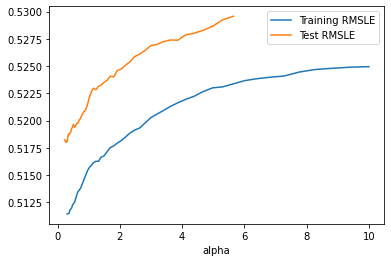

In [37]:
import matplotlib.pyplot as plt
plt.plot(alphas, df_score['rmsle_train'],label='Training RMSLE')
plt.plot(alphas, df_score['rmsle_test'],label='Test RMSLE')
plt.xlabel('alpha')
plt.legend()
plt.show()

In [34]:
df_score.to_csv('../4.Evaluation/Ridge_score.csv',index=False)

In [ ]:
#Giá trị tốt với alpha = 0.304585534067427

In [35]:
ridge = Ridge(alpha=0.304585534067427, normalize=True)
ridge.fit(X_train, y_train)
rmsle, r2 = eval(ridge, X_train, y_train)
rmsle, r2 = eval(ridge, X_test, y_test)

RMSLE: 0.5115
R2 value: -14.0431
RMSLE: 0.5181
R2 value: -13.9502


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [36]:
yridge_pred_submit = ridge.predict(X_submit_scl)

submission = pd.DataFrame()
submission['MemberID'] = df_target['MemberID']

yridge_pred_submit = yridge_pred_submit.clip(min=0)
yridge_pred_submit = yridge_pred_submit.clip(max=15)
#pred_y = pred_y.astype(int)

submission['DIH'] = yridge_pred_submit
submission.groupby(['DIH']).size()
submission.to_csv('../4.Evaluation/ridge.csv',index=False)